In [1]:
import glob
import logging
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

import skimage.color
import skimage.exposure
import skimage.feature
import skimage.io
import skimage.morphology
import skimage.transform

import yahtzee

logging.basicConfig(level=logging.DEBUG)

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


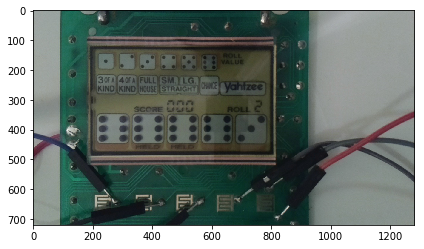

In [10]:
images = sorted(glob.glob('/Users/timpalpant/Desktop/images/*.jpg'))
test = skimage.io.imread(images[2])
skimage.io.imshow(test)

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


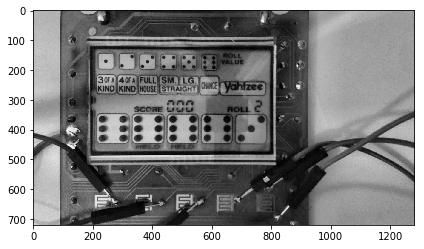

In [11]:
bw = yahtzee.preprocess(test)
skimage.io.imshow(bw)

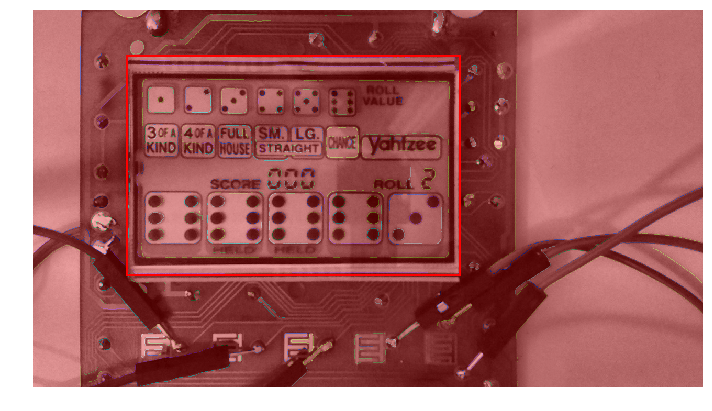

1.5215311004784688

In [12]:
edges = skimage.feature.canny(bw, sigma=3)
cleared = skimage.segmentation.clear_border(edges)
label_image = skimage.measure.label(cleared)
regions = skimage.measure.regionprops(label_image)

image_label_overlay = skimage.color.label2rgb(label_image, image=bw)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

largest_region = max(regions, key=lambda r: r.area)
minr, minc, maxr, maxc = largest_region.bbox
rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                          fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

height = maxr - minr
width = maxc - minc
aspect_ratio = width / height
aspect_ratio

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


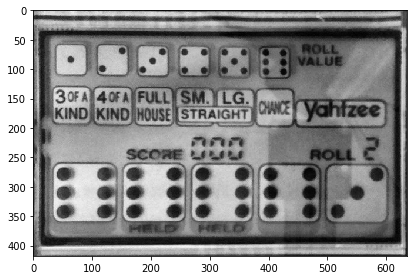

In [13]:
screen = yahtzee.preprocess(test[minr:maxr, minc:maxc])
skimage.io.imshow(screen)

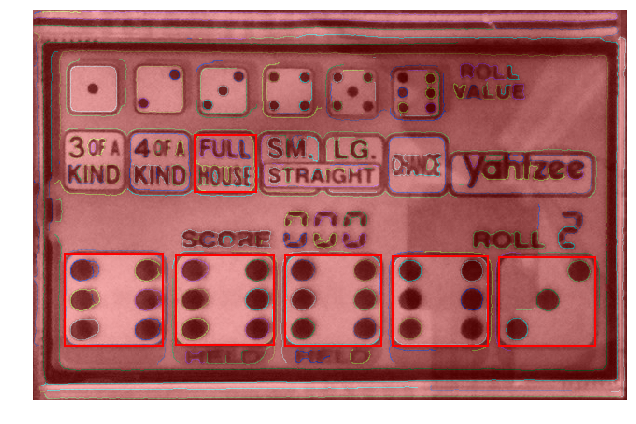

In [14]:
edges = skimage.feature.canny(screen, sigma=2)
cleared = skimage.segmentation.clear_border(edges)
label_image = skimage.measure.label(cleared)
regions = skimage.measure.regionprops(label_image)

image_label_overlay = skimage.color.label2rgb(label_image, image=screen)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

candidates = []
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    height = maxr - minr
    width = maxc - minc
    aspect_ratio = width / height
    if 0.9 < aspect_ratio < 1.1 and 250 < region.area < 500:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        candidates.append(region)

ax.set_axis_off()
plt.tight_layout()
plt.show()

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
DEBUG:yahtzee:Found 280 regions in labeled image


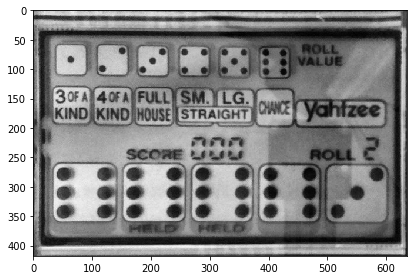

In [15]:
screen = yahtzee.extract_viewport(test)
bw = yahtzee.preprocess(screen)
skimage.io.imshow(bw)
regions = yahtzee.extract_dice_regions(bw)

In [16]:
yahtzee.extract_dice(test)

/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
DEBUG:yahtzee:Found 280 regions in labeled image
DEBUG:yahtzee:Selected 5 regions from image
DEBUG:yahtzee:Classifying region 261:360 x 34:139
/Users/timpalpant/.virtualenvs/yahtzee/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
DEBUG:yahtzee:Checking 1 - R = -0.22
DEBUG:yahtzee:Checking 2 - R = 0.32
DEBUG:yahtzee:Checking 3 - R = 0.14
DEBUG:yahtzee:Checking 4 - R = 0.50
DEBUG:yahtzee:Checking 5 - R = 0.35
DEBUG:yahtzee:Checking 6 - R = 0.68
DEBUG:yahtzee:Classifying region 262:359 x 153:258
DEBUG:yahtzee:Checking 1 - R = -0.21
DEBUG:yahtzee:Checking 2 - R = 0.33
DEBUG:yahtzee:Checking 3 - R = 0.15
DEBUG:yahtze

[6, 6, 6, 6, 3]

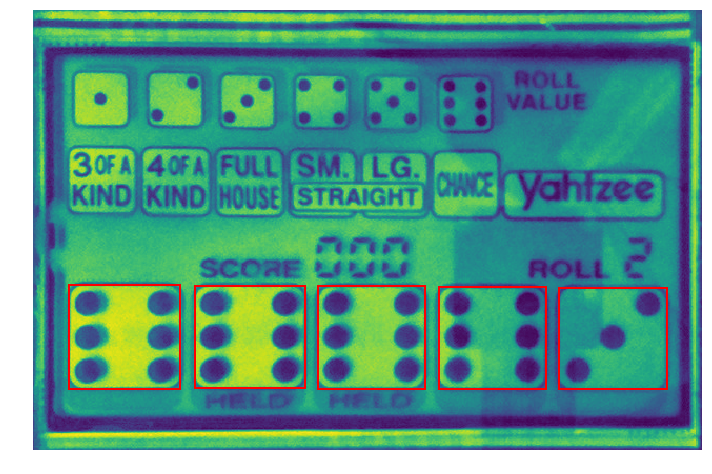

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(bw)

for r in regions:
    minr, minc, maxr, maxc = r.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()